# Part 1: Model a deep feed forward network for regression

In [ ]:
import numpy as np
import math
import keras
from keras.models import Sequential,Model
from keras.layers import Activation, Dense,Input
from keras.utils.vis_utils import plot_model
from keras import optimizers
from keras.models import Model
from keras.optimizers import SGD
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

In [ ]:
NT=800
NV=200
x_size = 8
y_size = 6

## Generate dataset

In [ ]:
def calculateY(x):
    y=[]
    y.append((2*x[0]*x[1]*x[2]) + (x[3]*x[4]) - (3*x[5]*x[6]*x[7]) - (7*(x[0]**2)*x[7]) + (2*x[4])) # y1
    y.append((x[0]*x[4]*x[5]) - (x[2]*x[3]) - (3*x[1]*x[2]) - ((x[1]**2)*x[3]) - (2*x[6]*x[7]) + 1) # y2
    y.append(((x[2]**2)) - (x[4]*x[6]) - (3*x[0]*x[3]*x[5]) - ((x[0]**2)*x[1]*x[3]) - 2) # y3
    y.append((x[5]**3) - (5*x[0]*x[2]*x[7]) - (x[0]*x[3]*x[6]) - (2*(x[4]**2)*x[1]*x[3]) - x[7]) # y4
    y.append(((x[2]**2)*x[4]) - (2*x[2]*x[3]*x[7]) - (x[0]*x[1]*x[3]) - (3*x[5]) + ((x[0]**2)*x[6]) - 1) # y5
    y.append(((x[0]**2)*x[2]*x[5]) - (2.5*x[2]*x[4]*x[6]) + (x[0]*x[2]*x[3]) + (2*x[3]) + ((x[1]**2)*x[2]) + 1) # y6
    return y

In [ ]:
def generate_instances(N_instance):
    X = np.random.random(size=(N_instance, x_size))
    np.set_printoptions(suppress=True)
    Y = np.zeros((N_instance,y_size))
    for i in range(len(X)):
        y_row=[]
        y_row=calculateY(X[i])
        Y[i,:]=y_row
    return X,Y

## Add noise

In [ ]:
MU=0
SIGMA=0.001

In [ ]:
X_train,Y_train = generate_instances(NT)
noise = np.random.normal(MU, SIGMA, (NT,y_size))
Y_train=Y_train+noise
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)

X_train shape:  (800, 8)
Y_train shape:  (800, 6)


In [ ]:
X_val,Y_val = generate_instances(NV)
noise = np.random.normal(MU, SIGMA, (NV,y_size))
Y_val=Y_val+noise
print("X_val shape: ", X_val.shape)
print("Y_val shape: ", Y_val.shape)

X_val shape:  (200, 8)
Y_val shape:  (200, 6)


In [ ]:
X_test,Y_test = generate_instances(100)
noise = np.random.normal(MU, SIGMA, (100,y_size))
Y_test=Y_test+noise
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_test shape:  (100, 8)
Y_test shape:  (100, 6)


## Create Model

In [ ]:
activation_func = ['relu','tanh','sigmoid']
lr_rate = [0.01, 0.001,0.0001]
epoch = 10

In [16]:
def show_history(history):  #train ve validation datası için accuracy ve loss grafiklerini çiz  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
def create_model(activation_func='relu',lr_rate=0.01, epoch=10, add_nodes = [0, 0, 0], show_summary=True): 
    model = Sequential()
    model.add(Dense((5 + add_nodes[0]), input_dim=x_size, activation = activation_func))
    model.add(Dense((5 + add_nodes[1]), activation= activation_func))
    model.add(Dense((5 + add_nodes[2]), activation=activation_func))
    model.add(Dense(y_size, activation='linear'))

    sgd = optimizers.SGD(lr=lr_rate, decay=0.0, momentum=0.9, nesterov=True)
    model.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])
    
    history=model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epoch, verbose=0)
    train_score = model.evaluate(X_train, Y_train)
    test_score = model.evaluate(X_test, Y_test)

    if show_summary:
      print(model.summary())

    return history,train_score[1]*100, train_score[0], test_score[0]

## Find best activitation

Activation function:  relu
4/4 [==============================] - 0s 2ms/step - loss: 0.4502 - accuracy: 0.8700
Model: "sequential_132"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_528 (Dense)            (None, 5)                 45        
_________________________________________________________________
dense_529 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_530 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_531 (Dense)            (None, 6)                 36        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


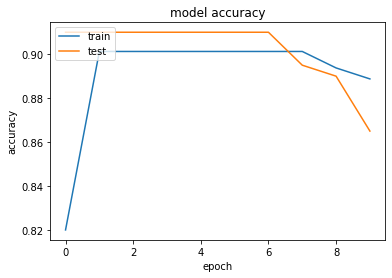

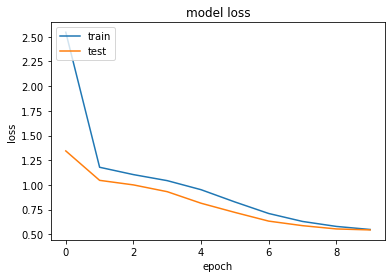

Activation function:  tanh
4/4 [==============================] - 0s 2ms/step - loss: 0.3009 - accuracy: 0.8700
Model: "sequential_133"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_532 (Dense)            (None, 5)                 45        
_________________________________________________________________
dense_533 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_534 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_535 (Dense)            (None, 6)                 36        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


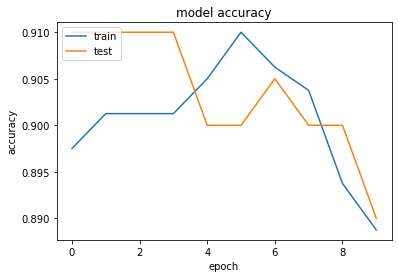

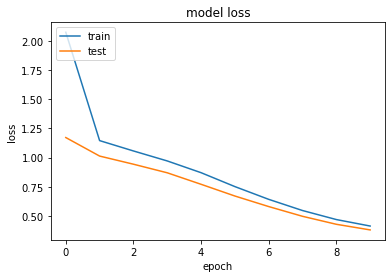

Activation function:  sigmoid
4/4 [==============================] - 0s 3ms/step - loss: 0.9622 - accuracy: 0.8800
Model: "sequential_134"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_536 (Dense)            (None, 5)                 45        
_________________________________________________________________
dense_537 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_538 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_539 (Dense)            (None, 6)                 36        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


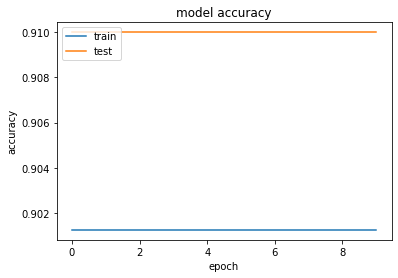

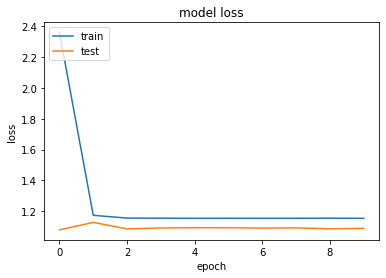

In [ ]:
scores = list()
for i in range(3):
    print("Activation function: ", activation_func[i])
    history,score,train_error,test_error=create_model(activation_func[i])
    show_history(history)
    scores.append(score)

In [ ]:
print('Scores: %s' % scores)

best_score = scores[0]
best=0
for i in range(2):
    if(best_score<scores[i]):
        best_score=scores[i]
        best=i
print("Best activation: ", activation_func[best])
best_activ = activation_func[best]


Scores: [88.37500214576721, 88.99999856948853, 90.12500047683716]
Best activation:  tanh


## Find best learning rate

Learning rate:  0.01
4/4 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.8900
Model: "sequential_135"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_540 (Dense)            (None, 5)                 45        
_________________________________________________________________
dense_541 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_542 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_543 (Dense)            (None, 6)                 36        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


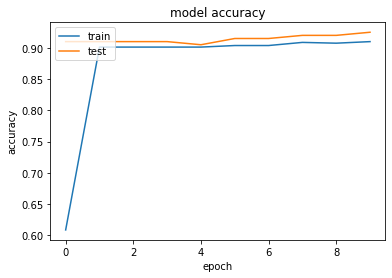

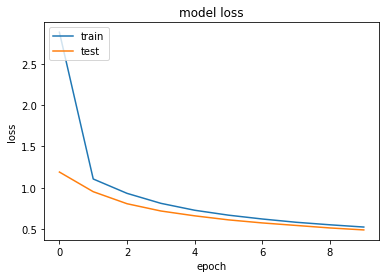

Learning rate:  0.001
4/4 [==============================] - 0s 2ms/step - loss: 0.9051 - accuracy: 0.8800
Model: "sequential_136"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_544 (Dense)            (None, 5)                 45        
_________________________________________________________________
dense_545 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_546 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_547 (Dense)            (None, 6)                 36        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


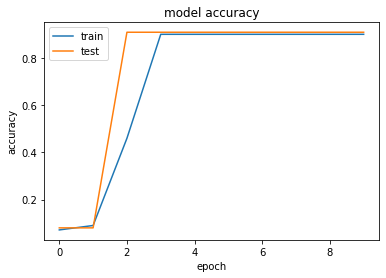

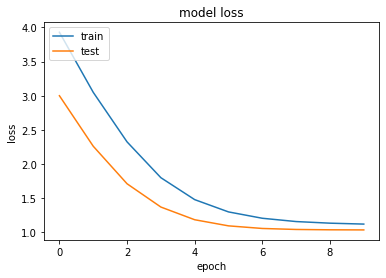

Learning rate:  0.0001
4/4 [==============================] - 0s 2ms/step - loss: 2.9830 - accuracy: 0.5500
Model: "sequential_137"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_548 (Dense)            (None, 5)                 45        
_________________________________________________________________
dense_549 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_550 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_551 (Dense)            (None, 6)                 36        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


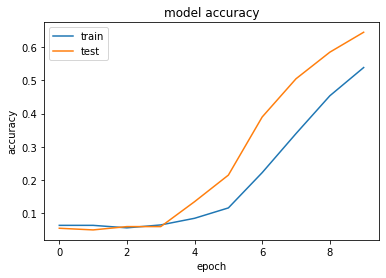

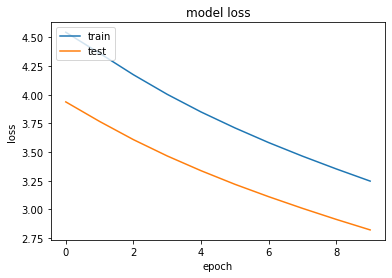

In [ ]:
scores = list()
for i in range(3):
    print("Learning rate: ", lr_rate[i])
    history,score,train_error,test_error=create_model(best_activ,lr_rate[i])
    show_history(history)
    scores.append(score)

In [ ]:
print('Scores: %s' % scores)

best_score = scores[0]
best=0
for i in range(2):
    if(best_score<scores[i]):
        best_score=scores[i]
        best=i

print("Best learning rate: ", lr_rate[best])
best_lr = lr_rate[best]


Scores: [91.25000238418579, 90.12500047683716, 60.00000238418579]
Best learning rate:  0.01


## Find best epoch

In [ ]:
scores = list()
temp_epoch = epoch

Epoch:  10
4/4 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.8900
Model: "sequential_138"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_552 (Dense)            (None, 5)                 45        
_________________________________________________________________
dense_553 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_554 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_555 (Dense)            (None, 6)                 36        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


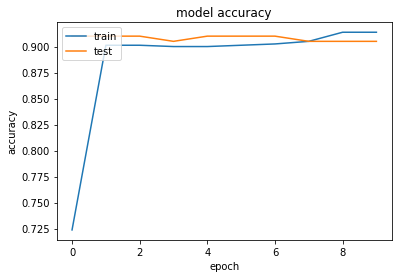

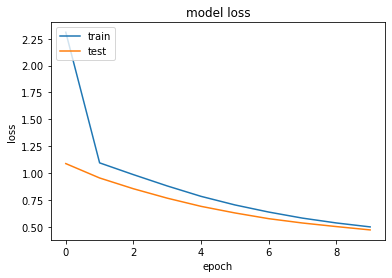

Epoch:  15
4/4 [==============================] - 0s 2ms/step - loss: 0.3078 - accuracy: 0.8900
Model: "sequential_139"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_556 (Dense)            (None, 5)                 45        
_________________________________________________________________
dense_557 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_558 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_559 (Dense)            (None, 6)                 36        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


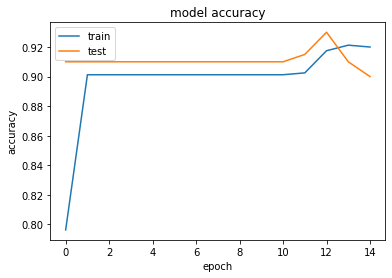

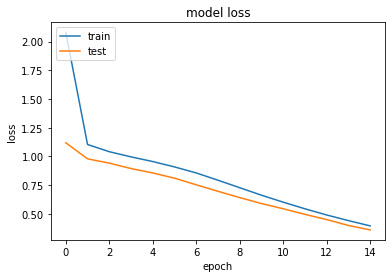

Epoch:  22
4/4 [==============================] - 0s 2ms/step - loss: 0.2209 - accuracy: 0.8700
Model: "sequential_140"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_560 (Dense)            (None, 5)                 45        
_________________________________________________________________
dense_561 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_562 (Dense)            (None, 5)                 30        
_________________________________________________________________
dense_563 (Dense)            (None, 6)                 36        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


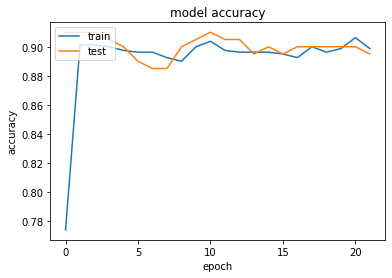

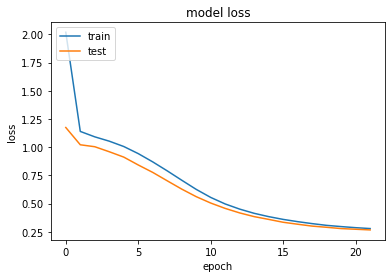

In [ ]:
for i in range(3):
    print("Epoch: ", temp_epoch)
    history,score,train_error,test_error=create_model(best_activ,best_lr,temp_epoch)
    show_history(history)
    scores.append(score)
    temp_epoch = int(temp_epoch + (temp_epoch/2))

In [ ]:
print('Scores: %s' % scores)
best_epoch = epoch
for i in range(2):
    epoch = epoch + (epoch/2)
    if(scores[i]<scores[i+1]):
        best_epoch = epoch

best_epoch=int(best_epoch)
print("Best epoch: ", best_epoch)


Scores: [91.00000262260437, 92.00000166893005, 90.12500047683716]
Best epoch:  15


## Add new nodes each iteration to each hidden layer

In [ ]:
def increase_nodes(repeat=100):
    train_errors = list()
    test_errors = list()
    add_nodes = [0, 0, 0]
    for i in range(repeat):
        print("\nStep: ",i+1)
        if add_nodes[0]>add_nodes[1]:
            add_nodes[1] += 2
        elif add_nodes[1]>add_nodes[2]:
            add_nodes[2] += 2
        else: 
            add_nodes[0] += 2  
        history,score, train_eror, test_error=create_model(best_activ,best_lr, best_epoch, add_nodes, False)
        train_errors.append(train_eror)
        test_errors.append(test_error)
    return train_errors, test_errors

In [ ]:
def plot_variance_bias_curve(train_errors, test_errors):
    plt.figure(figsize=(15,5))
    plt.plot(train_errors,label='Train')
    plt.plot(test_errors, label='Test')
    plt.xlabel("Model Compexity")
    plt.ylabel("Prediction Error")
    plt.title("Variance and bias curve")
    plt.legend()
    plt.show()

In [ ]:
train_errors, test_errors = increase_nodes()


Step:  1
4/4 [==============================] - 0s 2ms/step - loss: 0.3815 - accuracy: 0.8800

Step:  2
4/4 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.8700

Step:  3
4/4 [==============================] - 0s 2ms/step - loss: 0.1907 - accuracy: 0.8700

Step:  4
4/4 [==============================] - 0s 2ms/step - loss: 0.2162 - accuracy: 0.8800

Step:  5
4/4 [==============================] - 0s 2ms/step - loss: 0.1922 - accuracy: 0.8700

Step:  6
4/4 [==============================] - 0s 2ms/step - loss: 0.1954 - accuracy: 0.8600

Step:  7
4/4 [==============================] - 0s 2ms/step - loss: 0.2701 - accuracy: 0.8600

Step:  8
4/4 [==============================] - 0s 2ms/step - loss: 0.2289 - accuracy: 0.8700

Step:  9
4/4 [==============================] - 0s 2ms/step - loss: 0.1345 - accuracy: 0.8800

Step:  10
4/4 [==============================] - 0s 2ms/step - loss: 0.1838 - accuracy: 0.8600

Step:  11
4/4 [==============================] -

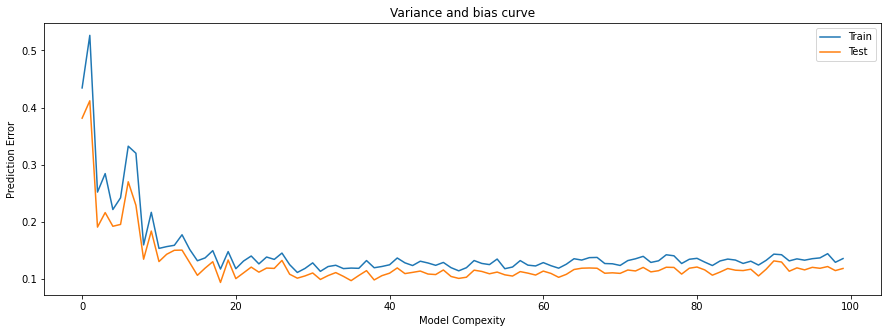

In [ ]:
plot_variance_bias_curve(train_errors, test_errors)

## Increase NT by 5%

In [ ]:
NEW_NT = int(NT*5/100)
print(NEW_NT)

X_train_add,Y_train_add = generate_instances(NEW_NT)
noise = np.random.normal(MU, SIGMA, (NEW_NT,y_size))
Y_train_add=Y_train_add+noise
X_train = np.vstack([X_train, X_train_add])
Y_train = np.vstack([Y_train, Y_train_add])

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)

40
X_train shape:  (840, 8)
Y_train shape:  (840, 6)


In [ ]:
train_errors, test_errors = increase_nodes()


Step:  1
4/4 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8600

Step:  2
4/4 [==============================] - 0s 2ms/step - loss: 0.3407 - accuracy: 0.8700

Step:  3
4/4 [==============================] - 0s 2ms/step - loss: 0.1914 - accuracy: 0.8300

Step:  4
4/4 [==============================] - 0s 2ms/step - loss: 0.3717 - accuracy: 0.8100

Step:  5
4/4 [==============================] - 0s 2ms/step - loss: 0.2568 - accuracy: 0.8700

Step:  6
4/4 [==============================] - 0s 2ms/step - loss: 0.1633 - accuracy: 0.8500

Step:  7
4/4 [==============================] - 0s 2ms/step - loss: 0.1551 - accuracy: 0.8900

Step:  8
4/4 [==============================] - 0s 2ms/step - loss: 0.1169 - accuracy: 0.8700

Step:  9
4/4 [==============================] - 0s 2ms/step - loss: 0.1384 - accuracy: 0.8800

Step:  10
4/4 [==============================] - 0s 2ms/step - loss: 0.1163 - accuracy: 0.8600

Step:  11
4/4 [==============================] -

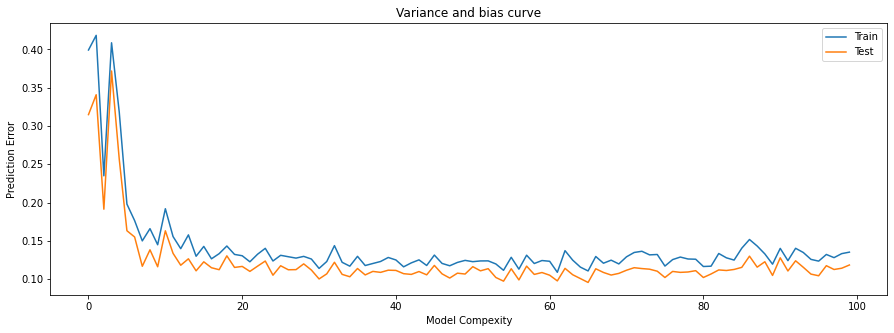

In [ ]:
plot_variance_bias_curve(train_errors, test_errors)

# Part 2: 2D Object Recognition using CNNs

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, AveragePooling2D
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.utils import to_categorical 

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!unzip '/content/drive/My Drive/Colab Notebooks/output.zip' 

Archive:  /content/drive/My Drive/Colab Notebooks/output.zip
   creating: output/
  inflating: output/shapes_ellipse_dims_scale_rota_trx_try.mat  
  inflating: output/shapes_rect_dims_scale_rota_trx_try.mat  
  inflating: output/shapes_poly3_dims_scale_rota_trx_try.mat  
  inflating: output/shapes_poly5_dims_scale_rota_trx_try.mat  
  inflating: output/shapes_poly6_dims_scale_rota_trx_try.mat  
  inflating: output/shapes_poly7_dims_scale_rota_trx_try.mat  
  inflating: output/shapes_star5_dims_scale_rota_trx_try.mat  
  inflating: output/shapes_star8_dims_scale_rota_trx_try.mat  


In [3]:
category_dict = {"oval":0, "rectangle":1, "triangle":2, "poly5":3,"poly6":4,"poly7":5,"star5":6,"star8":7}
categorical_labels = to_categorical(list(category_dict.values()), num_classes=8)

i=0
for key in category_dict.keys():
    category_dict[key] = categorical_labels[i]
    i +=1

## Generate various images of the following shape classes:

In [4]:
import scipy.io
from matplotlib import pyplot as plt
import random

def get_shapes(file, label):
    mat = scipy.io.loadmat(file)
    # delete dimention of the different shapes from mat
    mat['images'] = mat['images'].reshape(mat['images'].shape[1:])
    label = np.full((mat['images'].shape[0], label.shape[0]), label)
    
    f, axarr = plt.subplots(2,2)
    axarr[0,0].imshow(mat['images'][112])
    axarr[0,1].imshow(mat['images'][0])
    axarr[1,0].imshow(mat['images'][200])
    axarr[1,1].imshow(mat['images'][545])
    plt.show()
    return mat['images'], label

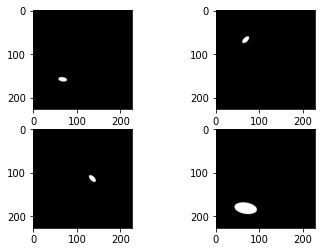

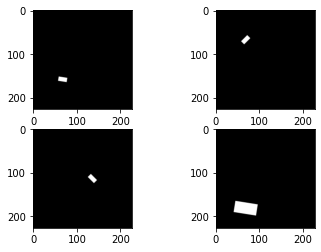

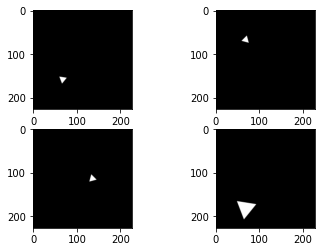

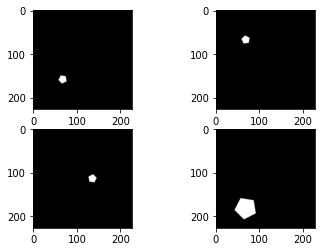

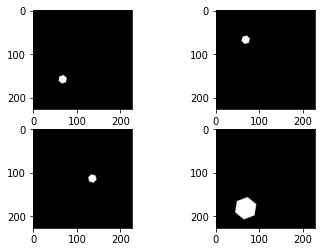

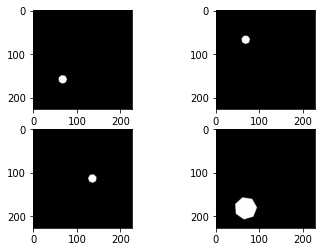

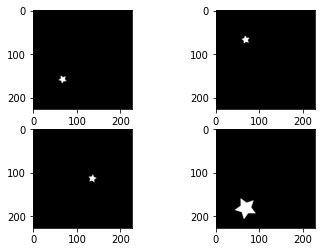

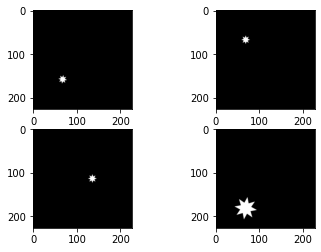

In [5]:
oval_mat, oval_label = get_shapes('output/shapes_ellipse_dims_scale_rota_trx_try.mat', category_dict['oval'])
rect_mat, rect_label = get_shapes('output/shapes_rect_dims_scale_rota_trx_try.mat', category_dict['rectangle'])
tri_mat, tri_label = get_shapes('output/shapes_poly3_dims_scale_rota_trx_try.mat', category_dict['triangle'])
poly5_mat, poly5_label = get_shapes('output/shapes_poly5_dims_scale_rota_trx_try.mat', category_dict['poly5'])
poly6_mat, poly6_label = get_shapes('output/shapes_poly6_dims_scale_rota_trx_try.mat', category_dict['poly6'])
poly7_mat, poly7_label = get_shapes('output/shapes_poly7_dims_scale_rota_trx_try.mat', category_dict['poly7'])
star5_mat, star5_label = get_shapes('output/shapes_star5_dims_scale_rota_trx_try.mat', category_dict['star5'])
star8_mat, star8_label = get_shapes('output/shapes_star8_dims_scale_rota_trx_try.mat', category_dict['star8'])

In [6]:
X = np.concatenate((oval_mat, rect_mat, tri_mat, poly5_mat, poly6_mat, poly7_mat, star5_mat, star8_mat), axis=0)
Y = np.concatenate((oval_label, rect_label, tri_label, poly5_label, poly6_label, poly7_label, star5_label, star8_label), axis=0)
print(X.shape)
print(Y.shape)
del oval_mat, rect_mat, tri_mat, poly5_mat, poly6_mat, poly7_mat, star5_mat, star8_mat

(10368, 227, 227, 3)
(10368, 8)


## 1. Generate your data (online or offline). Your data should have salt and pepper noise added in the images. Use only black-and-white colors.

In [7]:
from skimage.transform import resize
from skimage.util import random_noise

In [8]:
# convert images to gray-scale
X_scaled = []
rgb_weights = [0.2989, 0.5870, 0.1140]
for img in X:
    X_scaled.append(np.dot(img[...,:3], rgb_weights))
X = np.asarray(X_scaled)
del X_scaled

Gray scaled - noise added image example:


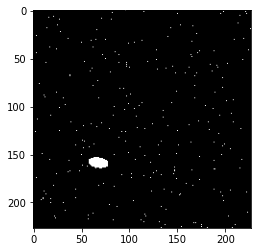

In [9]:
# add salt/paper noise to images
for idx in range(len(X)):
    # X[idx] = sp_noise(X[idx],0.01)
    X[idx] = random_noise(X[idx], mode='s&p',amount=0.01)

print("Gray scaled - noise added image example:")
plt.imshow(X[112], cmap='gray')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
del X, Y

#train datasetini uygun formata çevir
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')

print(X_train.shape)
print(X_test.shape)

# X_train = X_train / 255 #normalizasyon
# X_test = X_test / 255

print(y_train.shape)
print(y_test.shape)

(8294, 227, 227, 1)
(2074, 227, 227, 1)
(8294, 8)
(2074, 8)


## 2. Start with AlexNet architecture. Change the input layer to handle grayscale images. Change the number of outputs to the right number of object classes.

In [11]:
def show_scores(histories):
    for key in histories:
        print("-"*50)
        print("Results for ", key)
        print("\nAccuracy of test data: %", 100*histories[key][1][1])
        print("Error of test data:", histories[key][1][0])
        show_history(histories[key][0])

In [28]:
def alex_net(lr=0.001, activation='relu', d1_node=4096, d2_node=4096, d3_node=1000,del_3_layer=True, del_4_layer=True, show_sum = False):
    model = Sequential()

    # 1st Convolutional Layer
    model.add(Convolution2D(filters=96, input_shape=(X_train.shape[1],X_train.shape[2],1), kernel_size=(11,11),strides=(4,4), padding='valid'))
    model.add(Activation(activation))
    # Pooling 
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation before passing it to the next layer
    model.add(BatchNormalization())

    # 2nd Convolutional Layer
    model.add(Convolution2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
    model.add(Activation(activation))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())

    if del_3_layer:
        # 3rd Convolutional Layer
        model.add(Convolution2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
        model.add(Activation(activation))
        # Batch Normalisation
        model.add(BatchNormalization())

    if del_4_layer:
        # 4th Convolutional Layer
        model.add(Convolution2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
        model.add(Activation(activation))
        # Batch Normalisation
        model.add(BatchNormalization())

    # 5th Convolutional Layer
    model.add(Convolution2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation(activation))
    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    # Batch Normalisation
    model.add(BatchNormalization())

    # Passing it to a dense layer
    model.add(Flatten())
    # 1st Dense Layer
    model.add(Dense(d1_node, input_shape=(X_train.shape[1],X_train.shape[2],1,)))
    model.add(Activation(activation))
    # Add Dropout to prevent overfitting
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())

    # 2nd Dense Layer
    model.add(Dense(d2_node))
    model.add(Activation(activation))
    # Add Dropout
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())

    # 3rd Dense Layer
    model.add(Dense(d3_node))
    model.add(Activation(activation))
    # Add Dropout
    model.add(Dropout(0.4))
    # Batch Normalisation
    model.add(BatchNormalization())

    # Output Layer
    model.add(Dense(y_train.shape[1]))
    model.add(Activation('softmax'))

    if show_sum:
      model.summary()
    
    adam = Adam(lr=lr)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    history=model.fit(X_train, y_train, batch_size=32, epochs=25, verbose=2, validation_split=0.2)
    
    score = model.evaluate(X_test, y_test)
    
    return history, score


**Train Alexnet with default paramters**

In [29]:
history, score = alex_net(show_sum = True)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 55, 55, 96)        11712     
_________________________________________________________________
activation_63 (Activation)   (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_56 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_64 (Activation)   (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 8, 8, 256)        

In [30]:
print("Accuracy of test data: %", 100*score[1])
print("Error of test data:", score[0])

Accuracy of test data: % 94.98553276062012
Error of test data: 0.1442125290632248


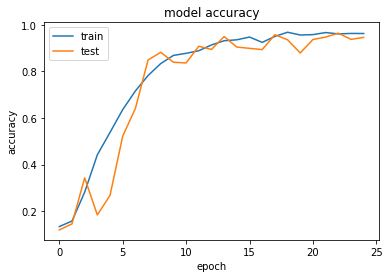

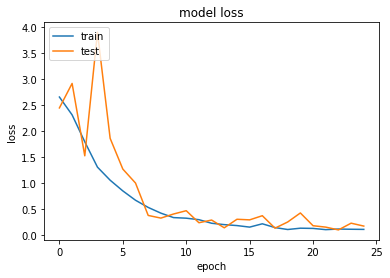

In [31]:
show_history(history)

## 3. Train the network with the data and report results.

**Use at least two different learning rate adjustment schemes.**

In [32]:
def try_different_lr(**params):
    histories = {}
    lr_list= [0.001, 0.0001]
    for lr_rate in lr_list:
        if lr_rate != lr_list[0]:
            params['show_sum'] = False
        print("\nLearning rate: ", lr_rate)
        history, score=alex_net(lr=lr_rate, **params)
        histories[str(lr_rate)] = [history, score]
    return histories

**Use at least three different activation functions.**

In [33]:
def try_different_activation(**params):
    histories = {}
    activation_list= ['linear', 'selu', 'relu', ]
    for activation in activation_list:
        if activation != activation_list[0]:
            params['show_sum'] = False
        print("\nActivation function: ", activation)
        history, score = alex_net(activation=activation, **params)
        histories[str(activation)] = [history, score]
    return histories

## 4. Change the network architecture

**Change the number of nodes in the fully connected layer by 10% for three times and repeat Step 3.**

In [34]:
d1_node = d2_node = 4096
d3_node = 1000

In [35]:
d1_node -= int(d1_node*10/100)
d2_node -= int(d2_node*10/100)
d3_node -= int(d3_node*10/100)

In [36]:
histories = try_different_lr(d1_node=d1_node,d2_node=d1_node,d3_node=d1_node, show_sum = True)


Learning rate:  0.001
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 55, 55, 96)        11712     
_________________________________________________________________
activation_72 (Activation)   (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_64 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_73 (Activation)   (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (N

--------------------------------------------------
Results for  0.001

Accuracy of test data: % 94.98553276062012
Error of test data: 0.18120884895324707


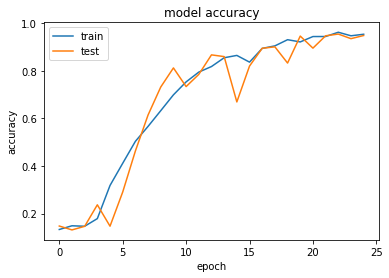

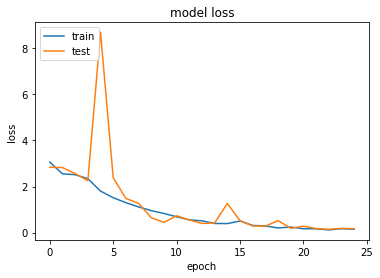

--------------------------------------------------
Results for  0.0001

Accuracy of test data: % 70.54001688957214
Error of test data: 1.2354843616485596


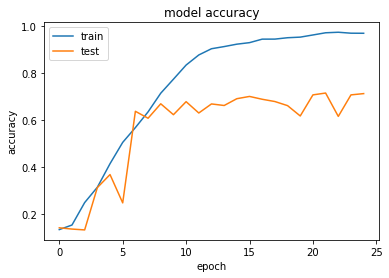

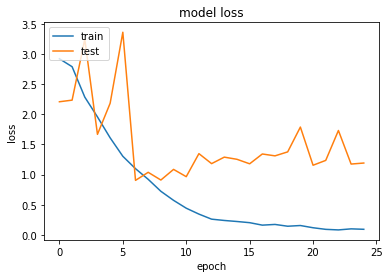

In [37]:
show_scores(histories)

In [38]:
histories  = try_different_activation(d1_node=d1_node,d2_node=d1_node,d3_node=d1_node)


Activation function:  linear
Epoch 1/25
208/208 - 5s - loss: 3.3290 - accuracy: 0.1278 - val_loss: 2.2950 - val_accuracy: 0.1302
Epoch 2/25
208/208 - 4s - loss: 2.4669 - accuracy: 0.1346 - val_loss: 2.4135 - val_accuracy: 0.1501
Epoch 3/25
208/208 - 4s - loss: 2.2890 - accuracy: 0.1898 - val_loss: 5.1511 - val_accuracy: 0.1489
Epoch 4/25
208/208 - 4s - loss: 2.0277 - accuracy: 0.2656 - val_loss: 2.1333 - val_accuracy: 0.2236
Epoch 5/25
208/208 - 4s - loss: 1.9647 - accuracy: 0.2714 - val_loss: 5.1900 - val_accuracy: 0.1320
Epoch 6/25
208/208 - 4s - loss: 1.8365 - accuracy: 0.2915 - val_loss: 1.9379 - val_accuracy: 0.2688
Epoch 7/25
208/208 - 4s - loss: 1.7729 - accuracy: 0.3296 - val_loss: 5.2859 - val_accuracy: 0.1893
Epoch 8/25
208/208 - 4s - loss: 1.6144 - accuracy: 0.3751 - val_loss: 6.1957 - val_accuracy: 0.1242
Epoch 9/25
208/208 - 4s - loss: 1.4671 - accuracy: 0.4276 - val_loss: 1.4126 - val_accuracy: 0.4569
Epoch 10/25
208/208 - 4s - loss: 1.3458 - accuracy: 0.4767 - val_loss:

--------------------------------------------------
Results for  linear

Accuracy of test data: % 49.08389449119568
Error of test data: 2.282820463180542


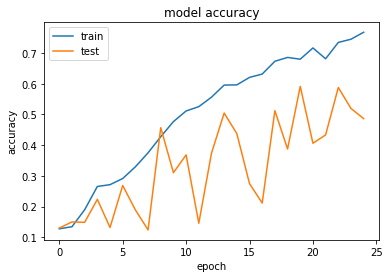

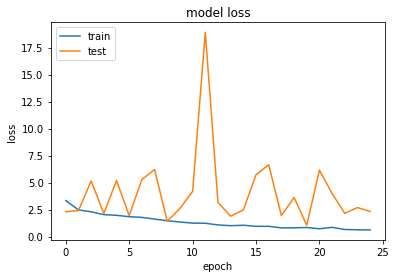

--------------------------------------------------
Results for  selu

Accuracy of test data: % 71.35969400405884
Error of test data: 1.2722464799880981


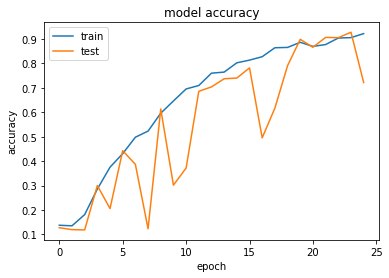

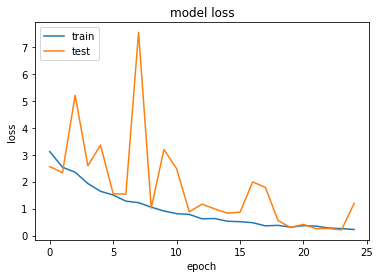

--------------------------------------------------
Results for  relu

Accuracy of test data: % 96.04628682136536
Error of test data: 0.1303681880235672


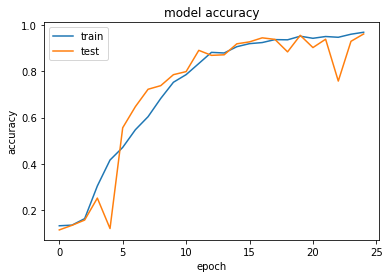

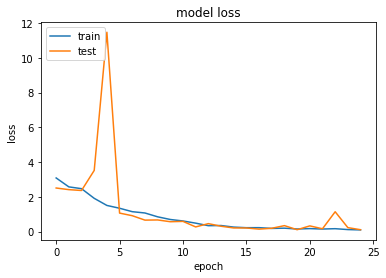

In [39]:
show_scores(histories)

**Continuing with %10 of the nodes in the fully connected layer, remove the third layer from the output and repeat Step 3.**

In [40]:
histories  = try_different_lr(d1_node=d1_node,d2_node=d1_node,d3_node=d1_node,del_3_layer=False,show_sum = True)


Learning rate:  0.001
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_65 (Conv2D)           (None, 55, 55, 96)        11712     
_________________________________________________________________
activation_117 (Activation)  (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_104 (Bat (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_118 (Activation)  (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_40 (MaxPooling (

--------------------------------------------------
Results for  0.001

Accuracy of test data: % 96.52844667434692
Error of test data: 0.1208428144454956


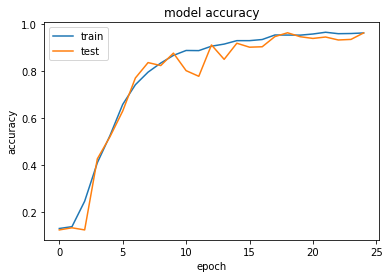

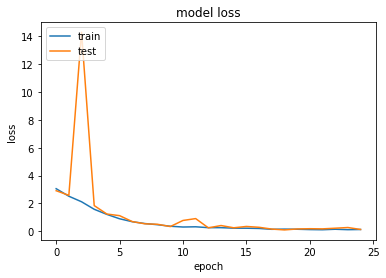

--------------------------------------------------
Results for  0.0001

Accuracy of test data: % 72.22757935523987
Error of test data: 1.2259575128555298


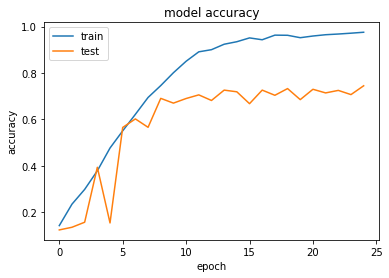

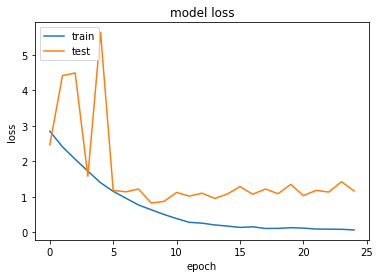

In [41]:
show_scores(histories)

In [42]:
histories  = try_different_activation(d1_node=d1_node,d2_node=d1_node,d3_node=d1_node,del_3_layer=False)


Activation function:  linear
Epoch 1/25
208/208 - 5s - loss: 3.1698 - accuracy: 0.1382 - val_loss: 2.3235 - val_accuracy: 0.1193
Epoch 2/25
208/208 - 4s - loss: 2.3943 - accuracy: 0.1739 - val_loss: 2.4109 - val_accuracy: 0.1682
Epoch 3/25
208/208 - 4s - loss: 2.0993 - accuracy: 0.2503 - val_loss: 2.1898 - val_accuracy: 0.2254
Epoch 4/25
208/208 - 4s - loss: 2.0001 - accuracy: 0.2740 - val_loss: 6.2354 - val_accuracy: 0.1356
Epoch 5/25
208/208 - 4s - loss: 1.8286 - accuracy: 0.3035 - val_loss: 6.7752 - val_accuracy: 0.1682
Epoch 6/25
208/208 - 4s - loss: 1.7491 - accuracy: 0.3210 - val_loss: 1.7782 - val_accuracy: 0.3159
Epoch 7/25
208/208 - 4s - loss: 1.6078 - accuracy: 0.3771 - val_loss: 3.7883 - val_accuracy: 0.2682
Epoch 8/25
208/208 - 4s - loss: 1.6083 - accuracy: 0.3789 - val_loss: 14.2089 - val_accuracy: 0.1507
Epoch 9/25
208/208 - 4s - loss: 1.4502 - accuracy: 0.4211 - val_loss: 3.0373 - val_accuracy: 0.2303
Epoch 10/25
208/208 - 4s - loss: 1.3773 - accuracy: 0.4615 - val_loss

--------------------------------------------------
Results for  linear

Accuracy of test data: % 42.478302121162415
Error of test data: 4.5557427406311035


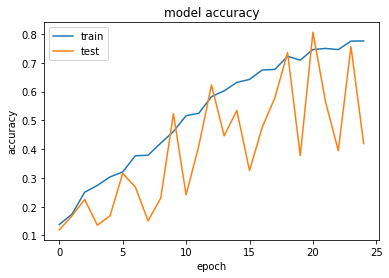

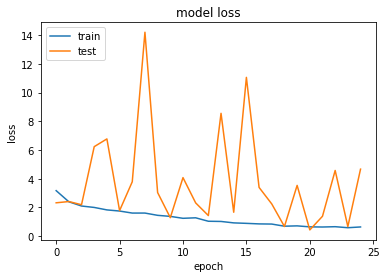

--------------------------------------------------
Results for  selu

Accuracy of test data: % 91.03182554244995
Error of test data: 0.23220959305763245


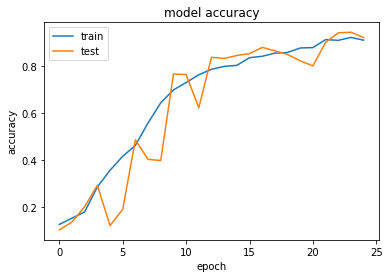

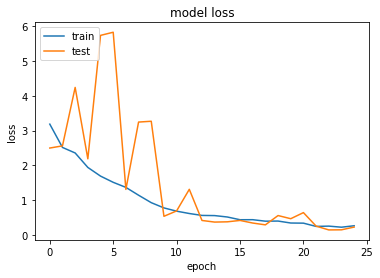

--------------------------------------------------
Results for  relu

Accuracy of test data: % 92.38187074661255
Error of test data: 0.3497810363769531


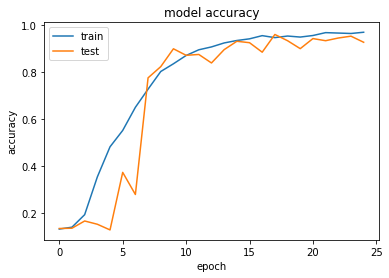

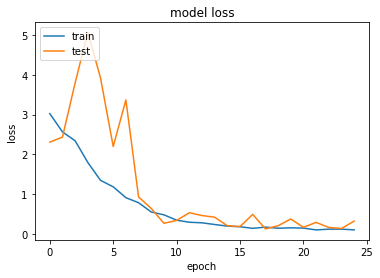

In [43]:
show_scores(histories)

**Continuing with %20 of the nodes in the fully connected layer, remove the third and fourth layers from the output and repeat Step 3.**

In [44]:
del_4_layer = True 
d1_node -= int(d1_node*10/100)
d2_node -= int(d2_node*10/100)
d3_node -= int(d3_node*10/100)

In [45]:
histories = try_different_lr(d1_node=d1_node,d2_node=d2_node,d3_node=d3_node,del_3_layer=False,del_4_layer=False,show_sum = True)


Learning rate:  0.001
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_85 (Conv2D)           (None, 55, 55, 96)        11712     
_________________________________________________________________
activation_157 (Activation)  (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_139 (Bat (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_158 (Activation)  (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_55 (MaxPooling (

--------------------------------------------------
Results for  0.001

Accuracy of test data: % 94.45515871047974
Error of test data: 0.16605974733829498


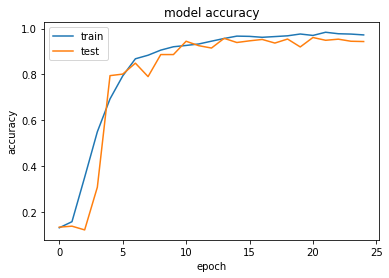

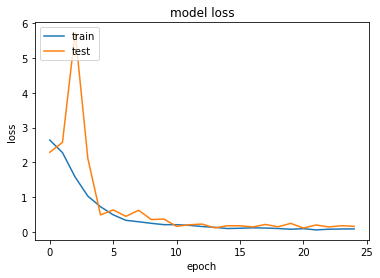

--------------------------------------------------
Results for  0.0001

Accuracy of test data: % 73.43298196792603
Error of test data: 1.0126527547836304


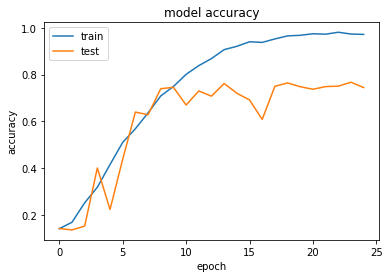

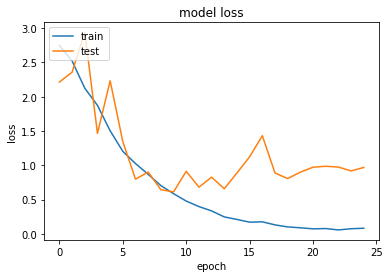

In [46]:
show_scores(histories)

In [47]:
histories = try_different_activation(d1_node=d1_node,d2_node=d2_node,d3_node=d3_node,del_3_layer=False,del_4_layer=False)


Activation function:  linear
Epoch 1/25
208/208 - 4s - loss: 2.5817 - accuracy: 0.1436 - val_loss: 2.1148 - val_accuracy: 0.1579
Epoch 2/25
208/208 - 4s - loss: 2.0577 - accuracy: 0.2119 - val_loss: 1.9281 - val_accuracy: 0.2224
Epoch 3/25
208/208 - 4s - loss: 1.7534 - accuracy: 0.2880 - val_loss: 2.2928 - val_accuracy: 0.2218
Epoch 4/25
208/208 - 4s - loss: 1.5795 - accuracy: 0.3479 - val_loss: 2.5806 - val_accuracy: 0.2182
Epoch 5/25
208/208 - 4s - loss: 1.3174 - accuracy: 0.4446 - val_loss: 1.7106 - val_accuracy: 0.4720
Epoch 6/25
208/208 - 4s - loss: 1.1660 - accuracy: 0.5035 - val_loss: 9.3704 - val_accuracy: 0.3122
Epoch 7/25
208/208 - 4s - loss: 1.0101 - accuracy: 0.5592 - val_loss: 1.8723 - val_accuracy: 0.4412
Epoch 8/25
208/208 - 4s - loss: 0.8817 - accuracy: 0.6096 - val_loss: 2.6502 - val_accuracy: 0.4605
Epoch 9/25
208/208 - 4s - loss: 0.8054 - accuracy: 0.6362 - val_loss: 3.1222 - val_accuracy: 0.4129
Epoch 10/25
208/208 - 4s - loss: 0.6562 - accuracy: 0.7112 - val_loss:

--------------------------------------------------
Results for  linear

Accuracy of test data: % 58.919960260391235
Error of test data: 3.7141637802124023


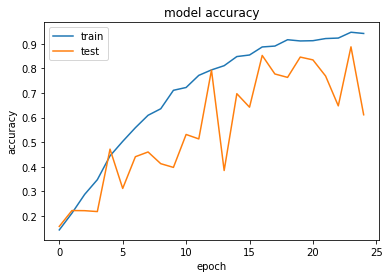

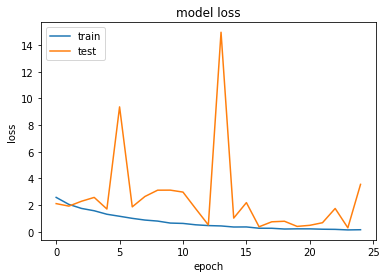

--------------------------------------------------
Results for  selu

Accuracy of test data: % 92.91224479675293
Error of test data: 0.19001802802085876


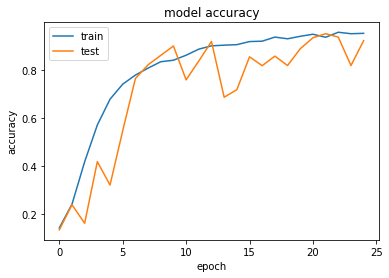

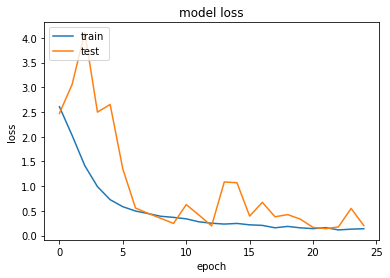

--------------------------------------------------
Results for  relu

Accuracy of test data: % 94.9373185634613
Error of test data: 0.18508198857307434


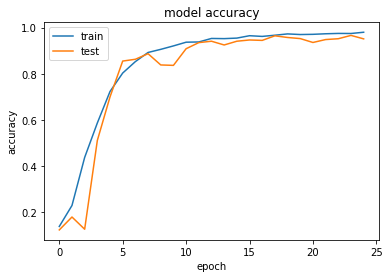

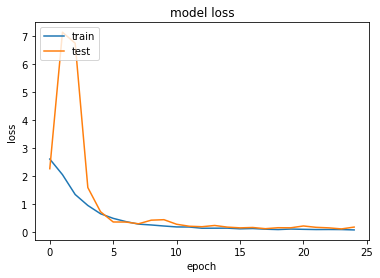

In [48]:
show_scores(histories)